In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.datasets import make_moons, make_classification
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

from imblearn import under_sampling
from imblearn import under_sampling
from imblearn import combine
from imblearn.metrics import geometric_mean_score

In [30]:
def plot_decision_boundaries(X, y, model, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    """
    reduced_data = X[:, :2]

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    fig = plt.gcf()
    fig.set_size_inches(15,10)
    plt.show()
    
    
def fitAndPlot(sampler, model, X_train, y_train, X_test, y_test):
    X_sampled = X_train
    y_sampled = y_train
    
    if sampler:
        X_sampled, y_sampled = sampler.fit_sample(X_train, y_train)

        print(f'Original dataset shape {Counter(y_train)}')
        print(f'Sampled dataset shape {Counter(y_sampled)}')

    # Fit a linear model
    model.fit(X_sampled, y_sampled)

    plot_decision_boundaries(X_sampled, y_sampled, model)

    print(metrics.confusion_matrix(y_test, model.predict(X_test), labels=[1,0]))
    print(f'\nAUC score: {metrics.roc_auc_score(y_test, model.predict(X_test))}')
    print(f'Geometric mean score: {geometric_mean_score(y_test, model.predict(X_test))}')

In [31]:
# Generate the dataset
X, y = make_classification(class_sep=1.3, n_samples=5000, n_features=7, 
                           n_informative=3, n_redundant=1, weights=[0.95, 0.05], n_clusters_per_class=1,
                          random_state=1)

# PCA
pca = PCA(n_components=2, random_state=42)
X_ = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.33)

# Transform to pandas dataframe
df = pd.DataFrame(X_test, columns=['PC1', 'PC2'])
df['y'] = y_test

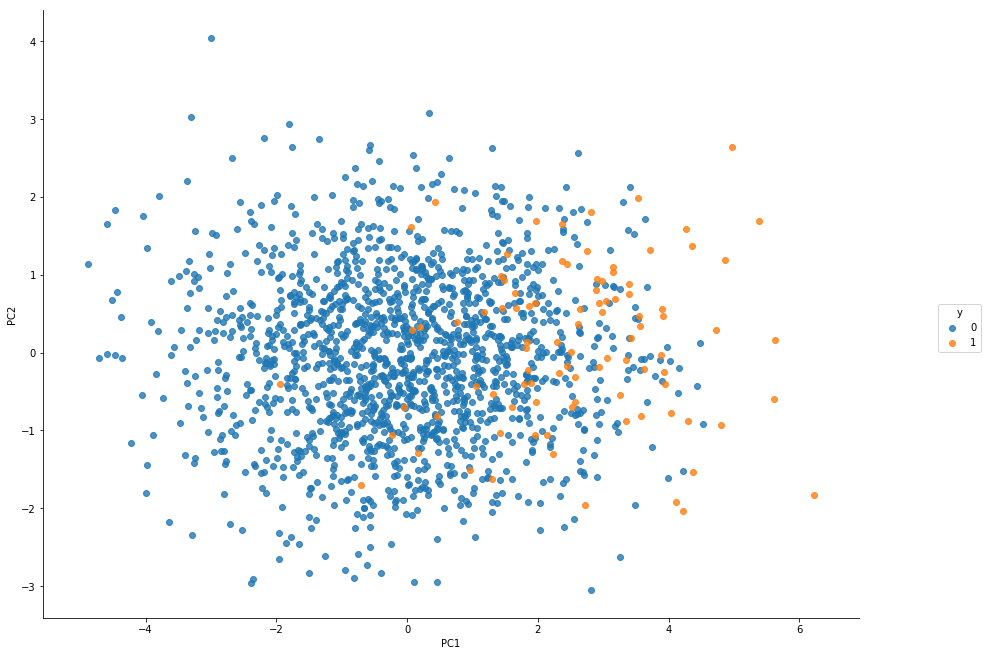

In [32]:
# Plot the data
sns.lmplot('PC1', 'PC2', df, hue='y', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

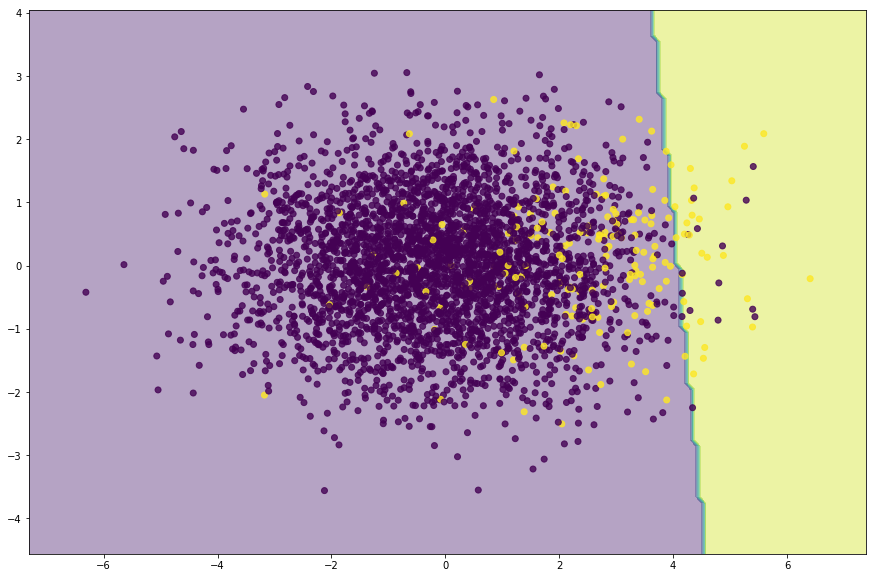

[[  12   82]
 [   5 1551]]

AUC score: 0.5622231034294153
Geometric mean score: 0.3567202788270919


In [33]:
sampler = None
model = LogisticRegression()

fitAndPlot(sampler=sampler, model=model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

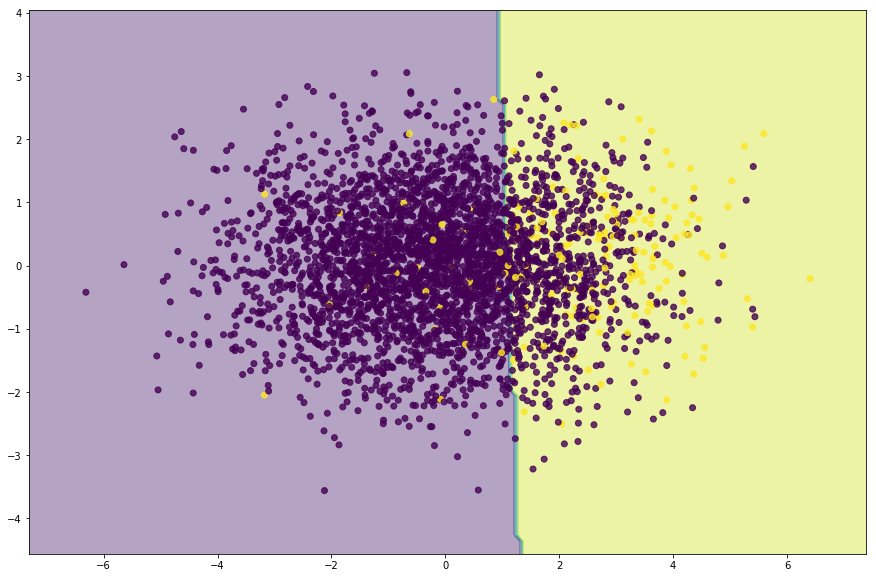

[[  81   13]
 [ 363 1193]]

AUC score: 0.814205819613849
Geometric mean score: 0.8128193018224192


In [34]:
sampler = None
model = LogisticRegression(class_weight={0:0.05, 1:0.95})

fitAndPlot(sampler=sampler, model=model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

Original dataset shape Counter({0: 3169, 1: 181})
Sampled dataset shape Counter({0: 181, 1: 181})


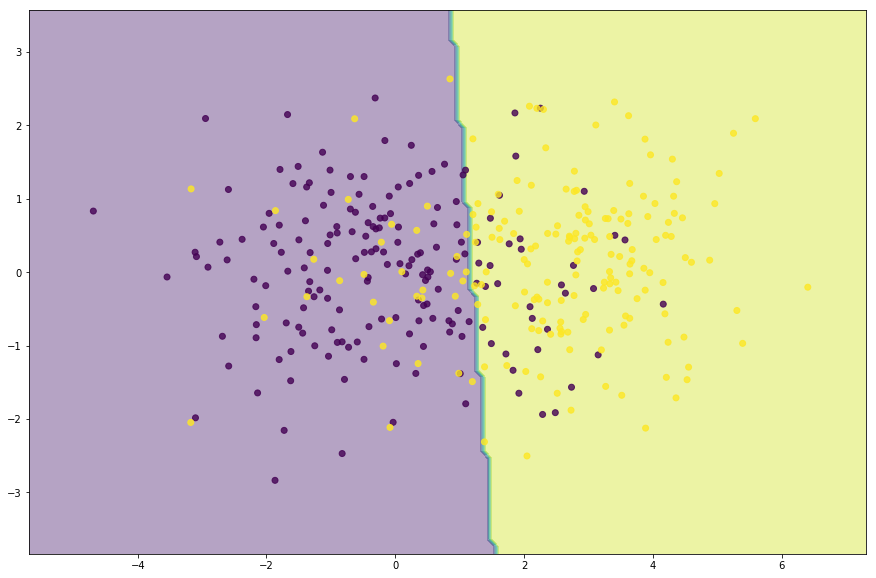

[[  80   14]
 [ 340 1216]]

AUC score: 0.816277416178964
Geometric mean score: 0.8155358518128312


In [35]:
from imblearn.under_sampling import RandomUnderSampler
sampler = RandomUnderSampler()
model = LogisticRegression()

fitAndPlot(sampler=sampler, model=model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

Original dataset shape Counter({0: 3169, 1: 181})
Sampled dataset shape Counter({0: 181, 1: 181})


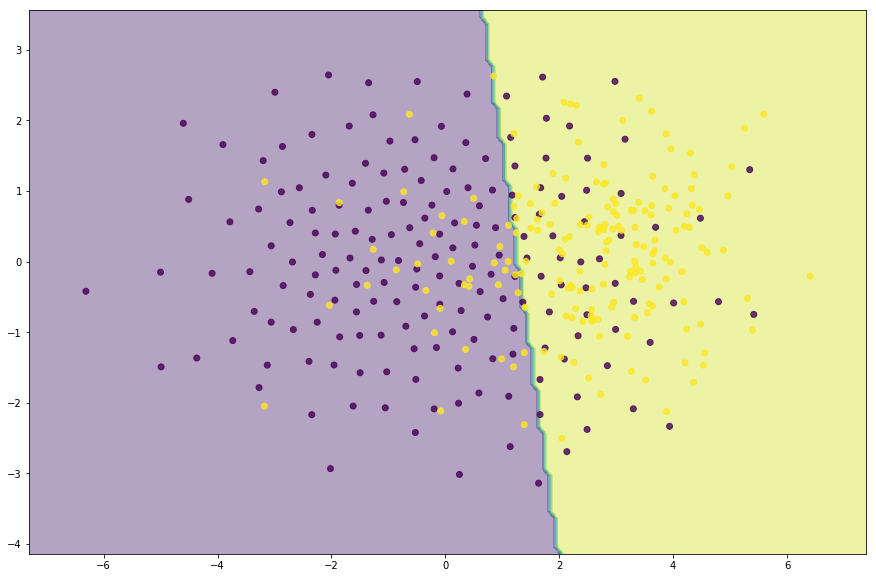

[[  77   17]
 [ 320 1236]]

AUC score: 0.8067467045889624
Geometric mean score: 0.8066513683227442


In [36]:
from imblearn.under_sampling import ClusterCentroids

sampler = ClusterCentroids()
model = LogisticRegression()

fitAndPlot(sampler=sampler, model=model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

Original dataset shape Counter({0: 3169, 1: 181})
Sampled dataset shape Counter({0: 3169, 1: 3169})


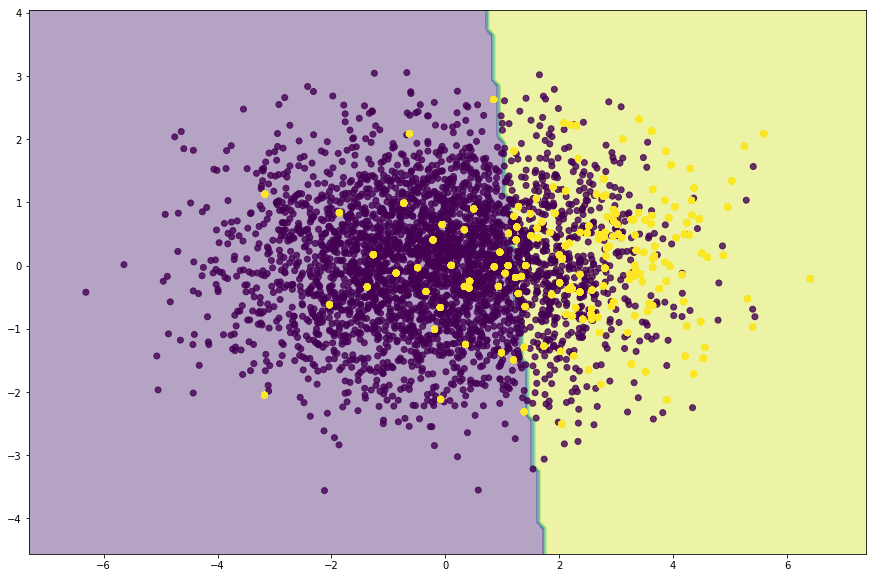

[[  80   14]
 [ 332 1224]]

AUC score: 0.8188481102663676
Geometric mean score: 0.8182141376819116


In [37]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler()
model = LogisticRegression()

fitAndPlot(sampler=sampler, model=model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

Original dataset shape Counter({0: 3169, 1: 181})
Sampled dataset shape Counter({0: 3169, 1: 3169})


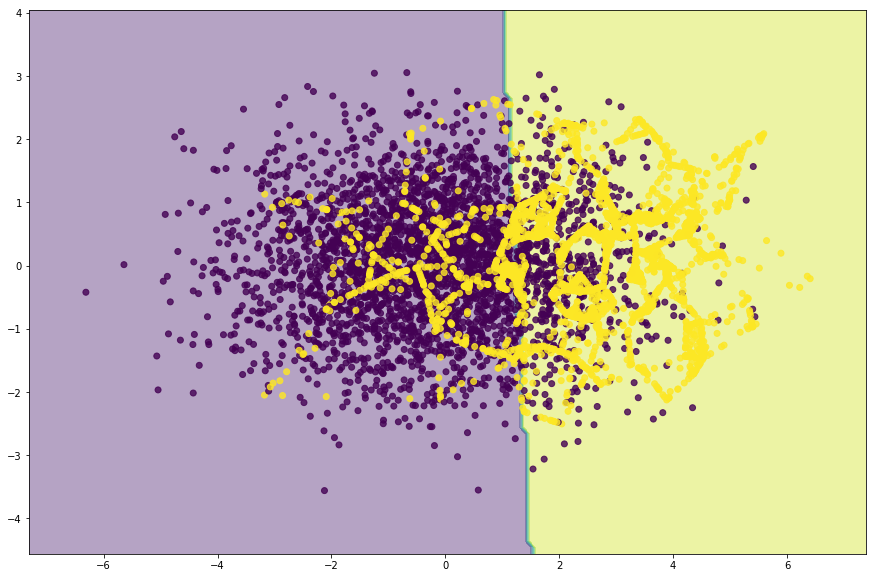

[[  79   15]
 [ 328 1228]]

AUC score: 0.8148143083738993
Geometric mean score: 0.8144117032309697


In [38]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
model = LogisticRegression()

fitAndPlot(sampler=sampler, model=model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

Original dataset shape Counter({0: 3169, 1: 181})
Sampled dataset shape Counter({0: 2919, 1: 2919})


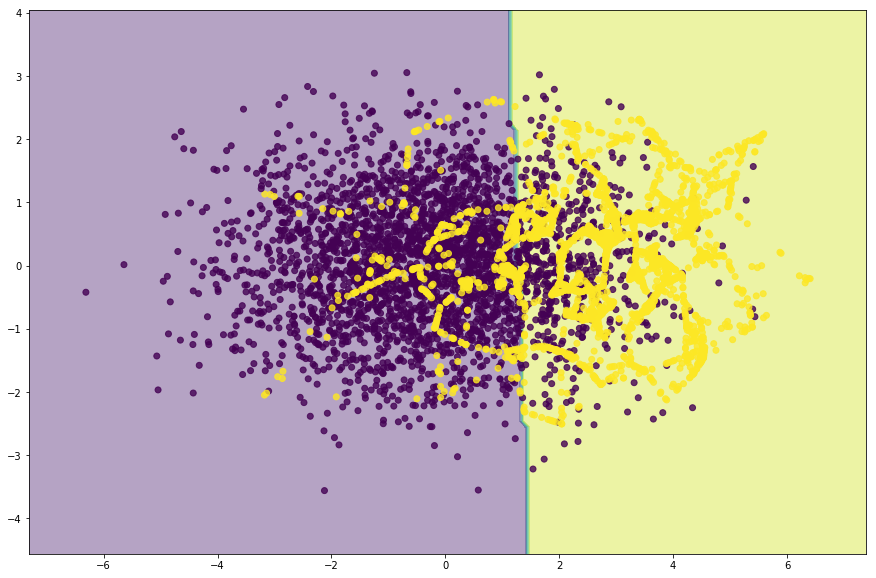

[[  79   15]
 [ 322 1234]]

AUC score: 0.816742328939452
Geometric mean score: 0.8163988839888648


In [39]:
from imblearn.combine import SMOTETomek
sampler = SMOTETomek()
model = LogisticRegression()

fitAndPlot(sampler=sampler, model=model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

Original dataset shape Counter({0: 3169, 1: 181})
Sampled dataset shape Counter({0: 3073, 1: 181})


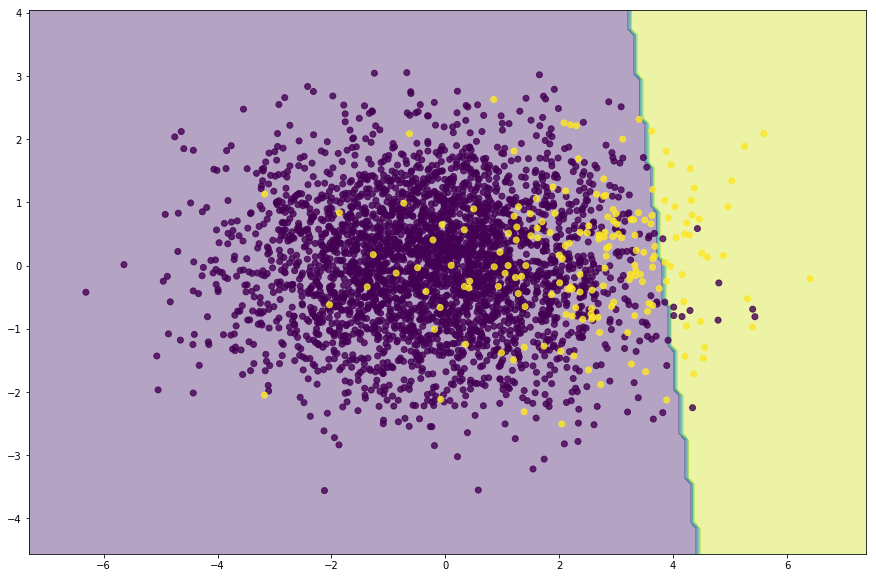

[[  22   72]
 [  11 1545]]

AUC score: 0.6134865722255647
Geometric mean score: 0.4820663965890397


In [40]:
from imblearn.under_sampling import OneSidedSelection
sampler = OneSidedSelection()
model = LogisticRegression()

fitAndPlot(sampler=sampler, model=model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)